In [1]:
import os
import time

import dask.dataframe as dd
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Functions

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [2]:
def getFiles(filepath):
    files = []
    for file in os.listdir(data_path):
        if not file.startswith('.'):
            if 'C2' in file:
                files.append(os.path.join(data_path, file))
    return files

In [3]:
def countCoverage(ddf):
    # Count number of nodes exceeding threhold
    ddf['0.1'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.1].count(axis=1)
    ddf['0.2'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.2].count(axis=1)
    ddf['0.3'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.3].count(axis=1)
    ddf['0.4'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.4].count(axis=1)
    ddf['0.5'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.5].count(axis=1)
    ddf['0.6'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.6].count(axis=1)
    ddf['0.7'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.7].count(axis=1)
    ddf['0.8'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.8].count(axis=1)
    ddf['0.9'] = ddf.iloc[:,1:11][ddf.iloc[:,1:11] > 0.9].count(axis=1)

    # Drop the node columns
    ddf = ddf.drop(list(ddf.columns[1:11]), axis=1)
    
    return ddf

### For plotting

In [5]:
cmap = plt.get_cmap('cubehelix', 11)
new_cmap = truncate_colormap(cmap, 0.2, 0.75)

In [6]:
color = []

for i in np.linspace(0, 1, 7):
    color.append(colors.rgb2hex(new_cmap(i)))

In [7]:
palette = sns.color_palette(color)
palette_two = sns.color_palette(color[1::3])
palette_three = sns.color_palette(color[1::2])
palette_four = sns.color_palette(color[0::2])

In [9]:
# palette_three

In [10]:
# palette_four

In [11]:
# Order of all possible bins for plotting
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]',
         '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]',
         '(100, 150]', '(150, 200]', '(200, 500]']

In [13]:
save_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/figures/figures_for_2025_06_10/'

## Threshold

In [14]:
# Thresholds
thresholds = ['0.1', '0.2', '0.3', '0.4', 
              '0.5', '0.6', '0.7', '0.8', '0.9']

### HUC2_01, Northeast

In [15]:
## Setup
bwidth = 'mean'
bbin = 'Bin'
huc2 = '01'
data_path = '../../narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_' + \
            huc2 + '_2025_05_24_' + bwidth

In [16]:
# Get list of files
files = getFiles(data_path)
len(files)

1295

In [17]:
ddf_ne = dd.read_parquet(files)

In [96]:
ddf_ne.columns

Index(['NHDPlusID', 'WidthM', 'Bin', 'index', 'cross_track', 'water_frac',
       'prior_water_prob', 'latitude', 'longitude', 'geo_qual_wse_suspect',
       'class_qual_area_suspect', 'Slope', 'LengthKM', 'alignment',
       'sinuosity', 'swot_slope', 'swot_r', 'swot_se', 'DropM', 'num_pixels',
       'num_wse', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9'],
      dtype='object')

In [18]:
ddf_ne = countCoverage(ddf_ne)

In [97]:
ddf_ne_melted = ddf_ne.melt(id_vars=['NHDPlusID', 'Bin', 'cross_track',
                                     'prior_water_prob', 'alignment',
                                     'sinuosity'],
                            value_vars=['0.1', '0.2', '0.3', '0.4', '0.5',
                                        '0.6', '0.7', '0.8', '0.9'],
                            var_name='threshold', value_name='coverage')

In [23]:
# test = ddf_ne_melted[(ddf_ne_melted['threshold'] == thresholds[7]) & (ddf_ne_melted['Bin'] == order[8])].sample(frac=0.01)

In [22]:
# test.describe().compute()

In [24]:
# ddf_ne_melted.describe(include=[np.number]).compute()

### troubleshoot

In [ ]:
# test = ddf_ne.get_partition(0).compute()

In [ ]:
# test = test.drop(test.columns[1:11], axis=1)

In [ ]:
# test.melt(id_vars=['NHDPlusID'],
#           value_vars=['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'],
#           var_name='threshold')

In [ ]:
# ddf_ne_melted = ddf_ne_melted.compute().reset_index().drop(columns='index')

In [ ]:
len(ddf_ne.NHDPlusID.unique())

In [ ]:
len(ddf_ne_melted.NHDPlusID.unique())

In [ ]:
# ne = ddf_ne_melted[ddf_ne_melted['coverage'] != 0]

In [ ]:
# ne = ne[ne['threshold'] == thresholds[4]].reset_index().drop(columns='index')

In [ ]:
# ne.compute()

In [ ]:
ddf_ne = ddf_ne.drop(list(ddf_ne.columns[-9:]), axis=1)

In [ ]:
temp = ddf_ne_melted.merge(right=ddf_ne, how='left', on='NHDPlusID').reset_index()

In [ ]:
temp.compute().iloc[[0]].NHDPlusID

In [ ]:
temp = temp.compute()

In [ ]:
temp.iloc[0].NHDPlusID

In [ ]:
temp[(temp.threshold == '0.5')].shape

In [ ]:
temp[(temp.threshold == '0.5') & (temp.coverage != 0)].shape

In [ ]:
temp[(temp.threshold == '0.5') & (temp.coverage != 0) & ~(temp.swot_slope.isna())]

In [ ]:
zeros = temp[temp['coverage'] == 0]

In [ ]:
ne = temp[temp['coverage'] != 0]

In [ ]:
ne['coverage'] = ne['coverage']*10

In [ ]:
ne = ne[['threshold', 'coverage', 'Bin', 'alignment']]

In [ ]:
ne = ne[ne['threshold'] == thresholds[4]].reset_index().drop(columns='index')

In [ ]:
ne.columns

In [ ]:
ne = ne.merge(ddf_ne[['NHDPlusID', bbin]], how='left', on='NHDPlusID')

In [ ]:
ne = ne.drop(columns='NHDPlusID')

In [ ]:
ne.compute()

In [ ]:
# test = ne.sample(frac=0.00005)

In [ ]:
del ddf_ne, ddf_ne_melted, temp

In [ ]:
# testy = test.get_partition(0)

In [ ]:
# testy = testy.compute()

In [ ]:
# ddf_ne = ddf_ne.sample(frac=0.1)

In [ ]:
# ne = ddf_ne[ddf_ne['threshold'] == thresholds[8]].reset_index()#.drop(columns='index')

In [ ]:
# ne = ne[['num_wse']]

In [ ]:
# del ne

In [ ]:
# ne = ne.sample(frac=0.005)

In [ ]:
# unique_val = ddf_ne['Bin'].unique()

In [ ]:
# unique_val.compute()

### HUC2_08, Southeast

In [25]:
## Setup
bwidth = 'mean'
bbin = 'Bin'
huc2 = '08'
data_path = '../../narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_' + \
            huc2 + '_2025_05_24_' + bwidth

In [26]:
# Get list of files
files = getFiles(data_path)
len(files)

1686

In [27]:
ddf_se = dd.read_parquet(files)

In [28]:
ddf_se = countCoverage(ddf_se)

In [98]:
ddf_se_melted = ddf_se.melt(id_vars=['NHDPlusID', 'Bin', 'cross_track',
                                     'prior_water_prob', 'alignment',
                                     'sinuosity'],
                            value_vars=['0.1', '0.2', '0.3', '0.4', '0.5',
                                        '0.6', '0.7', '0.8', '0.9'],
                            var_name='threshold', value_name='coverage')

In [30]:
# ddf_se_melted = ddf_se_melted.compute().reset_index().drop(columns='index')

### HUC2_15, Southwest

In [31]:
## Setup
bwidth = 'mean'
bbin = 'Bin'
huc2 = '15'
data_path = '../../narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_' + \
            huc2 + '_2025_05_24_' + bwidth

In [32]:
# Get list of files
files = getFiles(data_path)
len(files)

2412

In [33]:
ddf_sw = dd.read_parquet(files)

In [34]:
ddf_sw = countCoverage(ddf_sw)

In [99]:
ddf_sw_melted = ddf_sw.melt(id_vars=['NHDPlusID', 'Bin', 'cross_track',
                                     'prior_water_prob', 'alignment',
                                     'sinuosity'],
                            value_vars=['0.1', '0.2', '0.3', '0.4', '0.5',
                                        '0.6', '0.7', '0.8', '0.9'],
                            var_name='threshold', value_name='coverage')

In [ ]:
# ddf_sw_melted = ddf_sw_melted.compute().reset_index().drop(columns='index')

### HUC2_17, Northwest

In [38]:
## Setup
bwidth = 'mean'
bbin = 'Bin'
huc2 = '17'
data_path = '../../narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_' + \
            huc2 + '_2025_05_24_' + bwidth

In [39]:
# Get list of files
files = getFiles(data_path)
len(files)

4709

In [40]:
ddf_nw = dd.read_parquet(files)

In [41]:
ddf_nw = countCoverage(ddf_nw)

In [100]:
ddf_nw_melted = ddf_nw.melt(id_vars=['NHDPlusID', 'Bin', 'cross_track',
                                     'prior_water_prob', 'alignment',
                                     'sinuosity'],
                            value_vars=['0.1', '0.2', '0.3', '0.4', '0.5',
                                        '0.6', '0.7', '0.8', '0.9'],
                            var_name='threshold', value_name='coverage')

In [ ]:
# ddf_nw_melted = ddf_nw_melted.compute().reset_index().drop(columns='index')

### Cross-track

In [ ]:
i = 3

# Get ne reaches at threshold
ne = ddf_ne_melted[ddf_ne_melted['threshold'] == thresholds[i]].reset_index()#.drop(columns='index')
# ne = ne.sample(frac=0.05)
ne = ne.compute()

ne = ne[ne.coverage != 0]
if ne.shape[0] > 100000:
    ne = ne.sample(100000)
ne['huc2'] = '01'

# Get se reaches at threshold
se = ddf_se_melted[ddf_se_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
# se = se.sample(frac=0.05)
se = se.compute()

se = se[se.coverage != 0]
if se.shape[0] > 100000:
    se = se.sample(100000)
se['huc2'] = '08'

# Get sw reaches
sw = ddf_sw_melted[ddf_sw_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
# sw = sw.sample(frac=0.05)
sw = sw.compute()

sw = sw[sw.coverage != 0]
if sw.shape[0] > 100000:
    sw = sw.sample(100000)
sw['huc2'] = '15'

# Get nw reaches
nw = ddf_nw_melted[ddf_nw_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
# nw = nw.sample(frac=0.05)
nw = nw.compute()

nw = nw[nw.coverage != 0]
if nw.shape[0] > 100000:
    nw = nw.sample(100000)
nw['huc2'] = '17'

combined = pd.concat(objs=[ne, se, sw
                          , nw
                          ], axis=0).reset_index().drop(columns='index')

del ne, se, sw, nw

percent = str(int(float(thresholds[i])*100))

In [137]:
combined['cross_track'] = np.abs(combined['cross_track'])

In [138]:
cross_bins = [0, 15000, 30000, 45000, 60000]

In [139]:
## Bin reaches by width, set to string for parquet
# combined['cross_bin'] = combined['cross_track'].map_partitions(pd.cut, cross_bins).astype(str)
combined['cross_bin'] = pd.cut(combined['cross_track'], cross_bins).astype(str)

In [71]:
# combined = combined.compute()

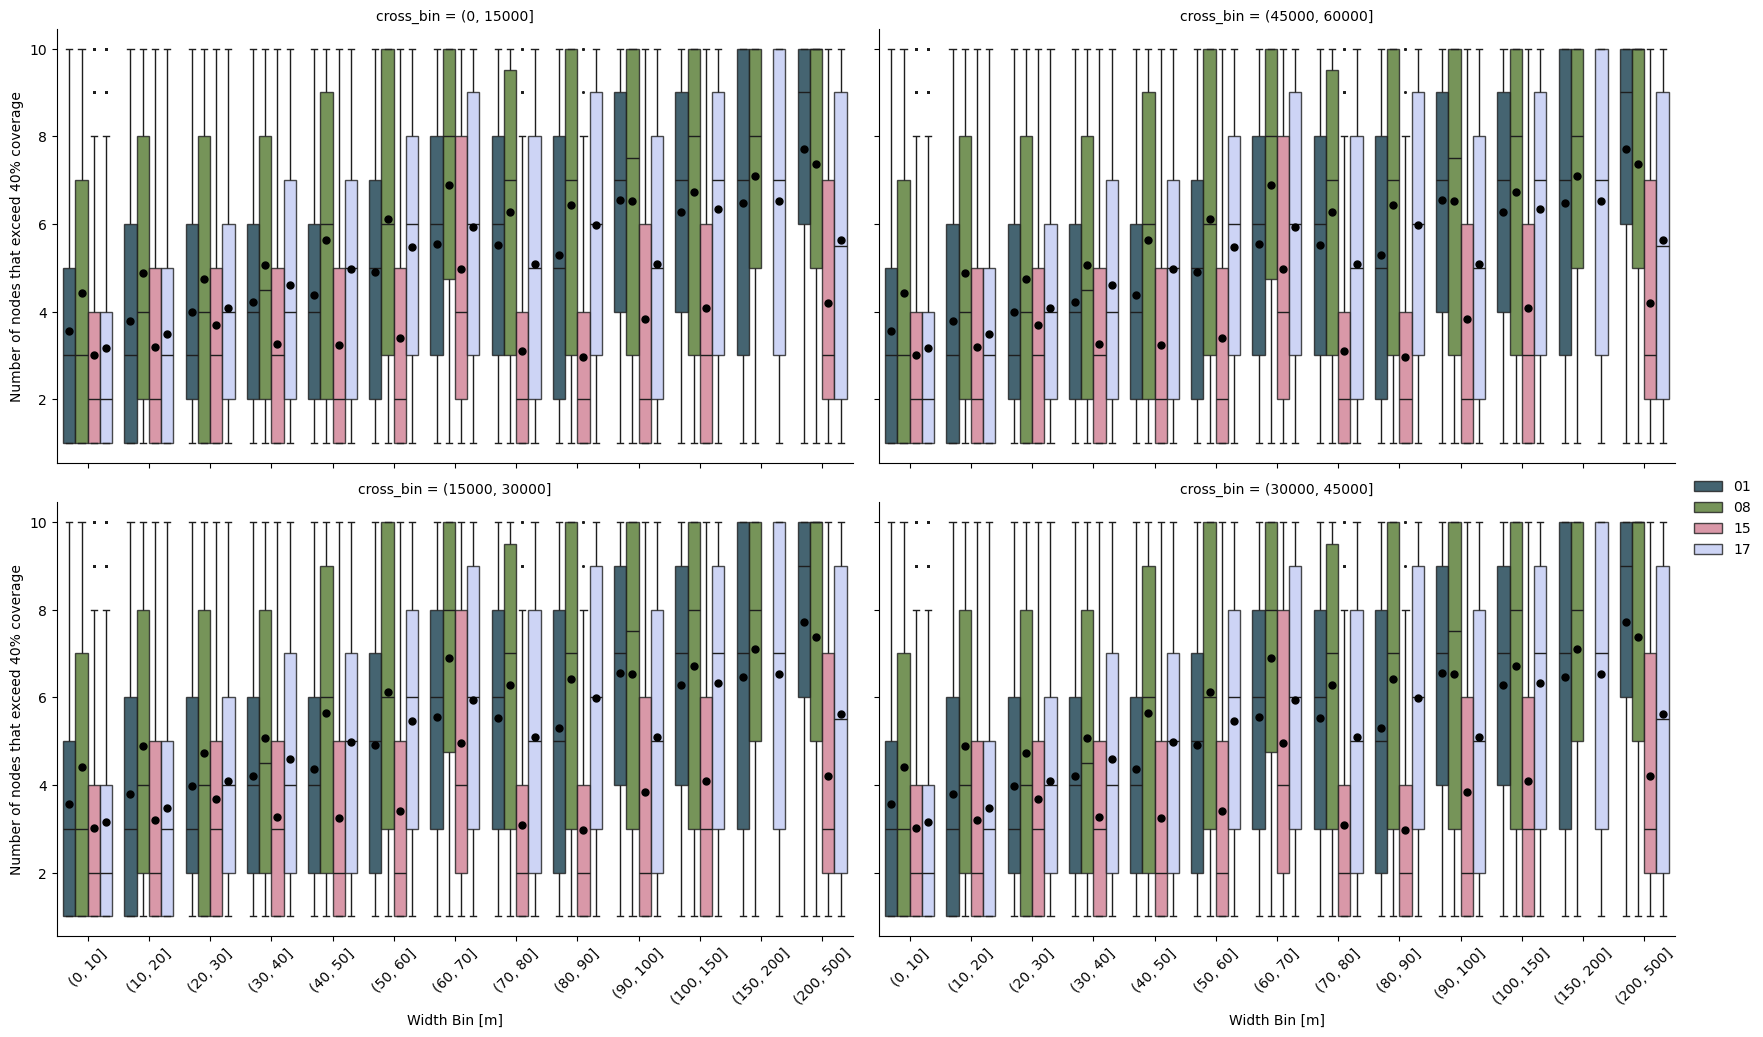

In [114]:
# fig, ax = plt.subplots(figsize=(10,10))

g = sns.FacetGrid(combined[combined['cross_bin'] != np.str_('nan')],
                  col='cross_bin', col_wrap=2,
                  height=5, aspect=1.7)

g.map(sns.boxplot, data=combined[combined['cross_bin'] != np.str_('nan')],
      x='Bin', y='coverage', order=order, ax=ax,hue='huc2',
      palette=palette_four, legend=True, saturation=1,
      showmeans=True, fliersize=1, linewidth=1,
      boxprops=dict(alpha=0.8),
      meanprops={'marker':'o',
                 'markerfacecolor':'k',
                 'markeredgecolor':'k',
                 'markersize':'5'}
     )
# Rotate x-axis labels
for ax in g.axes.flat: # Iterate through all axes in the grid
    plt.sca(ax)  # Set current axis
    plt.xticks(rotation=45) # Rotate labels 45 degrees
    plt.xlabel('Width Bin [m]');
    plt.ylabel('Number of nodes that exceed ' + percent + '% coverage');
    
# Add legend (if you want it outside the plot)
g.add_legend()  # Use FacetGrid's add_legend method

plt.savefig(save_path + 'cross_track_' + percent + '.png')

In [140]:
combined['alignment'] = np.abs(combined['alignment'])

In [141]:
align_bins = [0, 45, 135, 225, 315, 360]

In [142]:
## Bin reaches by width, set to string for parquet
# combined['cross_bin'] = combined['cross_track'].map_partitions(pd.cut, cross_bins).astype(str)
combined['align_bin'] = pd.cut(combined['alignment'], align_bins).astype(str)

In [126]:
# combined['aligned'] = 'no'

In [ ]:
# combined.loc[['align_bin'] == '(0, 45]', combined['aligned']] = 'yes'

In [134]:
# combined.loc[['align_bin'] == '(135, 225]', combined['aligned']] = 'yes'

In [71]:
# combined = combined.compute()

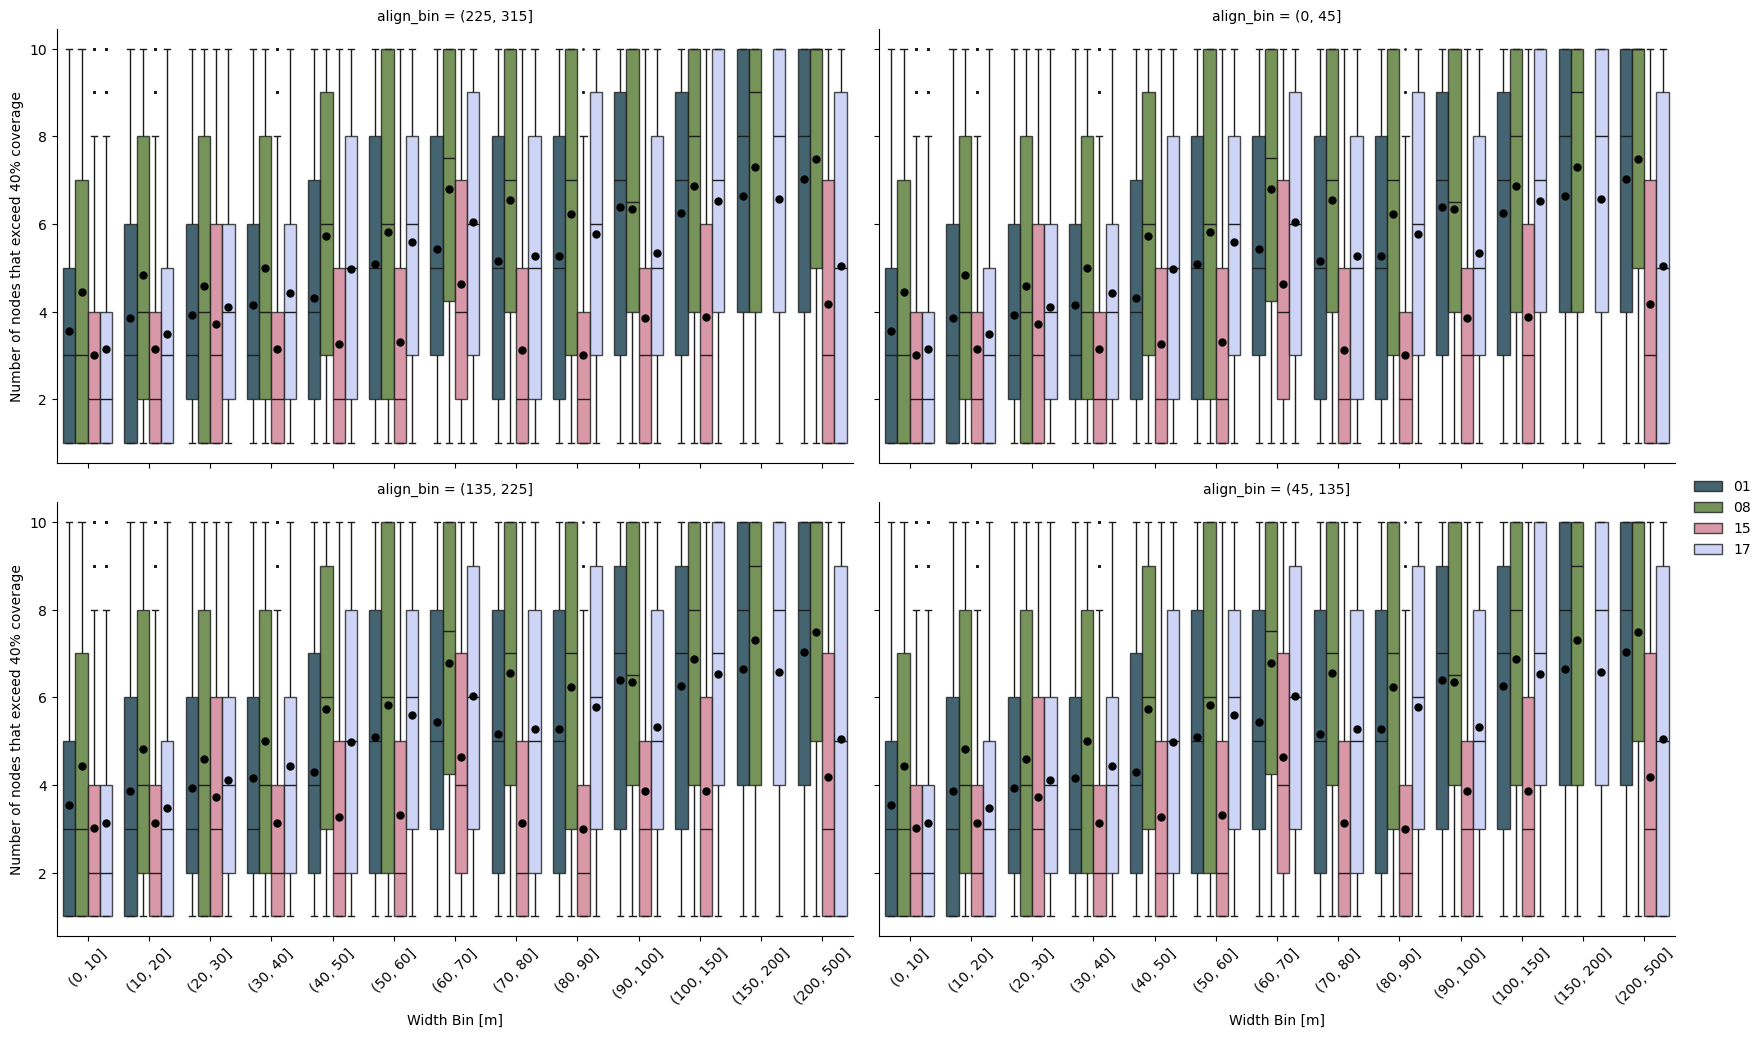

In [143]:
# fig, ax = plt.subplots(figsize=(10,10))

g = sns.FacetGrid(combined[combined['align_bin'] != np.str_('nan')],
                  col='align_bin', col_wrap=2,
                  height=5, aspect=1.7)

g.map(sns.boxplot, data=combined[combined['align_bin'] != np.str_('nan')],
      x='Bin', y='coverage', order=order, ax=ax,hue='huc2',
      palette=palette_four, legend=True, saturation=1,
      showmeans=True, fliersize=1, linewidth=1,
      boxprops=dict(alpha=0.8),
      meanprops={'marker':'o',
                 'markerfacecolor':'k',
                 'markeredgecolor':'k',
                 'markersize':'5'}
     )
# Rotate x-axis labels
for ax in g.axes.flat: # Iterate through all axes in the grid
    plt.sca(ax)  # Set current axis
    plt.xticks(rotation=45) # Rotate labels 45 degrees
    plt.xlabel('Width Bin [m]');
    plt.ylabel('Number of nodes that exceed ' + percent + '% coverage');
    
# Add legend (if you want it outside the plot)
g.add_legend()  # Use FacetGrid's add_legend method

plt.savefig(save_path + 'align_' + percent + '.png')

In [146]:
combined.prior_water_prob.unique()

array([0.  , 0.1 , 0.8 , 0.79, 0.71, 0.93, 0.84,  nan, 0.26, 0.74, 0.81,
       0.29, 0.69, 0.97, 0.11, 0.28, 0.45, 0.01, 0.87, 0.08, 0.92, 0.85,
       0.06, 0.17, 0.02, 0.98, 0.35, 0.04, 0.09, 0.43, 0.12, 0.2 , 0.95,
       0.59, 0.89, 0.37, 0.96, 0.03, 0.72, 0.94, 0.88, 0.51, 0.73, 0.21,
       0.27, 0.82, 0.15, 0.49, 0.42, 0.47, 0.07, 0.16, 0.66, 0.91, 0.31,
       0.78, 0.58, 0.86, 0.18, 0.05, 0.41, 0.77, 0.83, 0.75, 0.32, 0.76,
       0.61, 0.25, 0.7 , 0.63, 0.67, 0.64, 0.53, 0.57, 0.22, 0.5 , 0.24,
       0.3 , 0.9 , 0.13, 0.54, 0.14, 0.56, 0.39, 0.52, 0.68, 0.6 , 0.62,
       0.33, 0.23, 0.65, 0.46, 0.34, 0.19, 0.44, 0.48, 0.38, 0.36, 0.4 ,
       0.55, 0.99, 1.  ], dtype=float32)

In [147]:
prior_bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [148]:
## Bin reaches by width, set to string for parquet
# combined['cross_bin'] = combined['cross_track'].map_partitions(pd.cut, cross_bins).astype(str)
combined['prior_bin'] = pd.cut(combined['prior_water_prob'], prior_bins).astype(str)

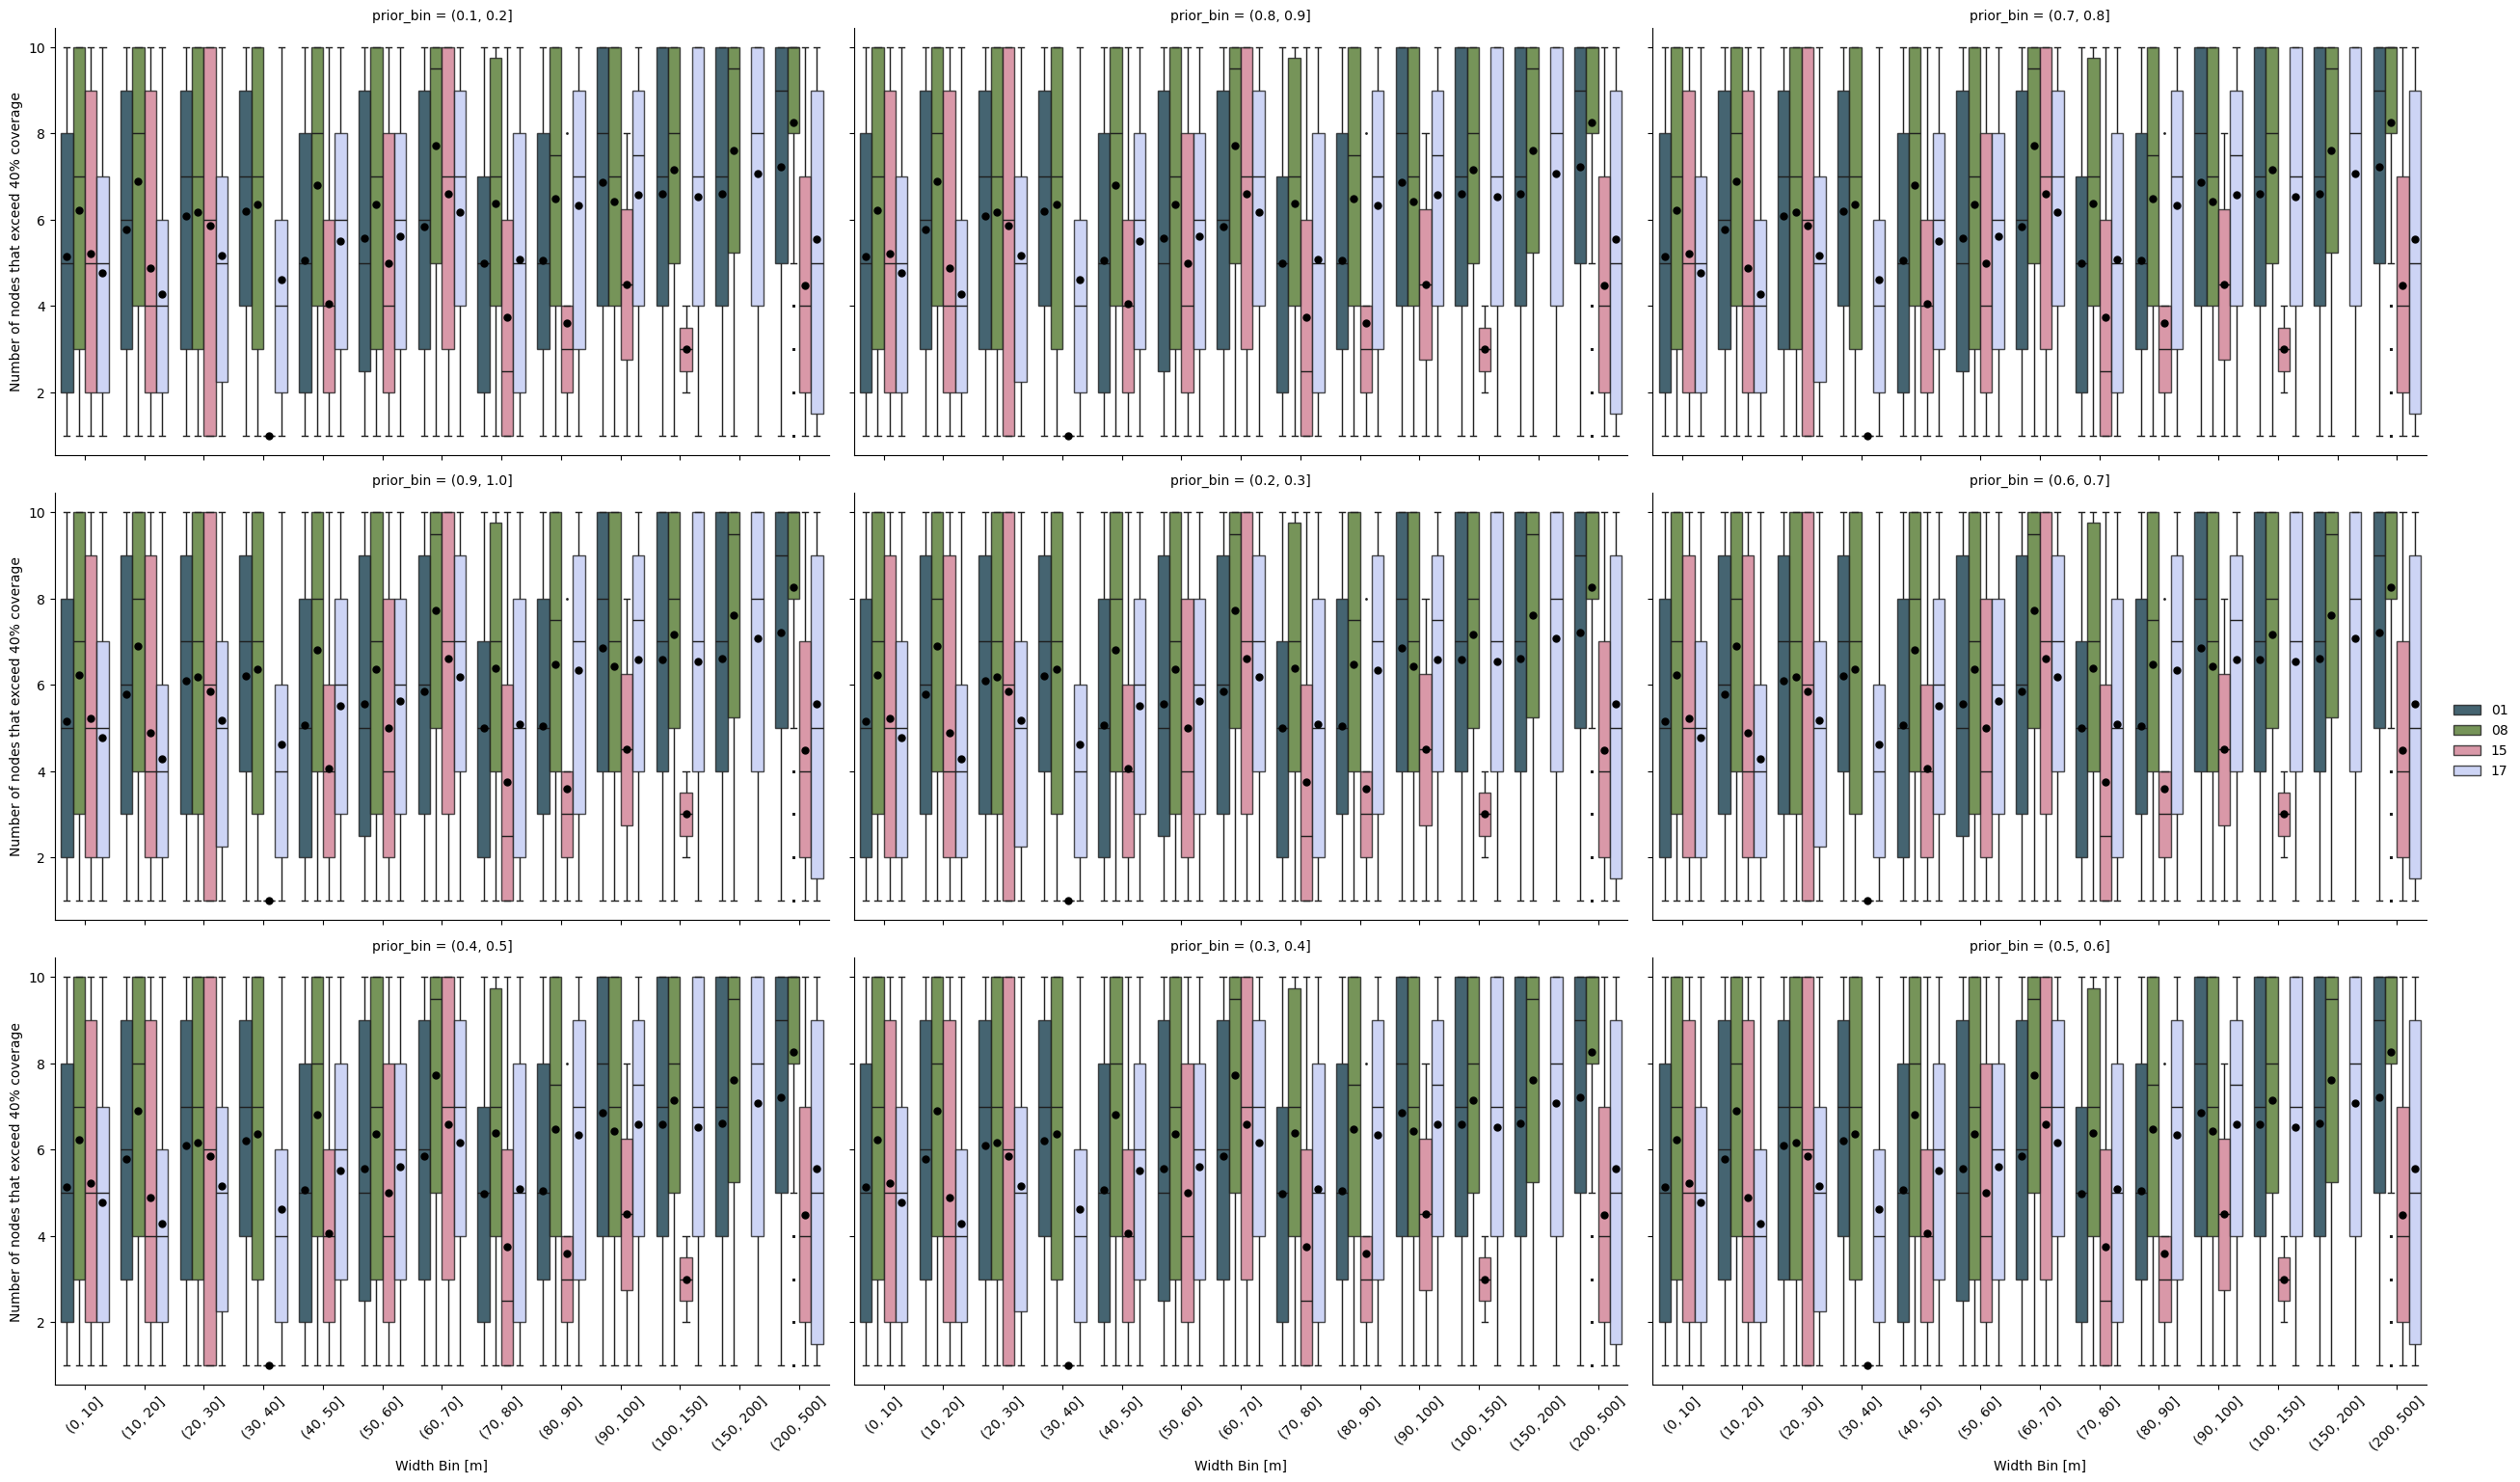

In [149]:
# fig, ax = plt.subplots(figsize=(10,10))

g = sns.FacetGrid(combined[combined['prior_bin'] != np.str_('nan')],
                  col='prior_bin', col_wrap=3,
                  height=5, aspect=1.7)

g.map(sns.boxplot, data=combined[combined['prior_bin'] != np.str_('nan')],
      x='Bin', y='coverage', order=order, ax=ax,hue='huc2',
      palette=palette_four, legend=True, saturation=1,
      showmeans=True, fliersize=1, linewidth=1,
      boxprops=dict(alpha=0.8),
      meanprops={'marker':'o',
                 'markerfacecolor':'k',
                 'markeredgecolor':'k',
                 'markersize':'5'}
     )
# Rotate x-axis labels
for ax in g.axes.flat: # Iterate through all axes in the grid
    plt.sca(ax)  # Set current axis
    plt.xticks(rotation=45) # Rotate labels 45 degrees
    plt.xlabel('Width Bin [m]');
    plt.ylabel('Number of nodes that exceed ' + percent + '% coverage');
    
# Add legend (if you want it outside the plot)
g.add_legend()  # Use FacetGrid's add_legend method

plt.savefig(save_path + 'prior_' + percent + '.png')

### Four

In [ ]:
for i in range(len(thresholds)):
    
    # Get ne reaches at threshold
    ne = ddf_ne_melted[ddf_ne_melted['threshold'] == thresholds[i]].reset_index()#.drop(columns='index')
    # ne = ne.sample(frac=0.05)
    ne = ne.compute()
    
    zeros = ne[ne.coverage == 0].count()
    reaches = ne.shape[0]
    ne_zeros = round(((zeros['coverage']/reaches)*100), 1)
    
    ne = ne[ne.coverage != 0]
    if ne.shape[0] > 100000:
        ne = ne.sample(100000)
    ne['huc2'] = '01'
    
    # Get se reaches at threshold
    se = ddf_se_melted[ddf_se_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
    # se = se.sample(frac=0.05)
    se = se.compute()
    
    zeros = se[se.coverage == 0].count()
    reaches = se.shape[0]
    se_zeros = round(((zeros['coverage']/reaches)*100), 1)
    
    se = se[se.coverage != 0]
    if se.shape[0] > 100000:
        se = se.sample(100000)
    se['huc2'] = '08'
    
    # Get sw reaches
    sw = ddf_sw_melted[ddf_sw_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
    # sw = sw.sample(frac=0.05)
    sw = sw.compute()
    
    zeros = sw[sw.coverage == 0].count()
    reaches = sw.shape[0]
    sw_zeros = round(((zeros['coverage']/reaches)*100), 1)
    
    sw = sw[sw.coverage != 0]
    if sw.shape[0] > 100000:
        sw = sw.sample(100000)
    sw['huc2'] = '15'
    
    # Get nw reaches
    nw = ddf_nw_melted[ddf_nw_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
    # nw = nw.sample(frac=0.05)
    nw = nw.compute()
    
    zeros = nw[nw.coverage == 0].count()
    reaches = nw.shape[0]
    nw_zeros = round(((zeros['coverage']/reaches)*100), 1)
    
    nw = nw[nw.coverage != 0]
    if nw.shape[0] > 100000:
        nw = nw.sample(100000)
    nw['huc2'] = '17'
    
    #     # Get combined reaches at 10% threshold
    #     both = pd.concat(objs=[ne, sw], axis=0).reset_index()
    
    #     combo = both.copy()
    #     combo['huc2'] = 'combined'
    
    combined = pd.concat(objs=[ne, se, sw, nw], axis=0).reset_index().drop(columns='index')
    
    del ne, se, sw, nw
    
    percent = str(int(float(thresholds[i])*100))
    
    fig, ax = plt.subplots(figsize=(14,8))
    sns.boxplot(data=combined, x='Bin', y='coverage',
                order=order,
                hue='huc2', palette=palette_four,
                legend=True,
                saturation=1, showmeans=True,
                fliersize=2, linewidth=2,
                boxprops=dict(alpha=0.9),
                meanprops={'marker':'o',
                           'markerfacecolor':'k',
                           'markeredgecolor':'k',
                           'markersize':'8'})
    
    plt.title('Reaches by proportion of nodes that meet or exceed ' + percent +
              '% coverage, excluding reaches with 0% coverage\nHUC2_01: ' +
              str(ne_zeros) + '% of reaches have 0% coverage in all nodes\nHUC2_08: ' +
              str(se_zeros)+ '% of reaches have 0% coverage in all nodes\nHUC2_15: ' +
              str(sw_zeros) + '% of reaches have 0% coverage in all nodes\nHUC2_17: ' +
              str(nw_zeros) + '% of reaches have 0% coverage in all nodes')
    
    plt.legend(title='HUC2', loc='upper left',
               title_fontproperties={'weight': 'bold'})
    
    plt.xlabel('Width Bin [m]')
    plt.ylabel('Number of nodes that exceed ' + percent + '% coverage')
    plt.xticks(rotation=-45)
    
    plt.savefig(save_path + 'threshold_four_hucs_mean_' + percent + '.png')

    del combined

### Combined

KeyboardInterrupt: 

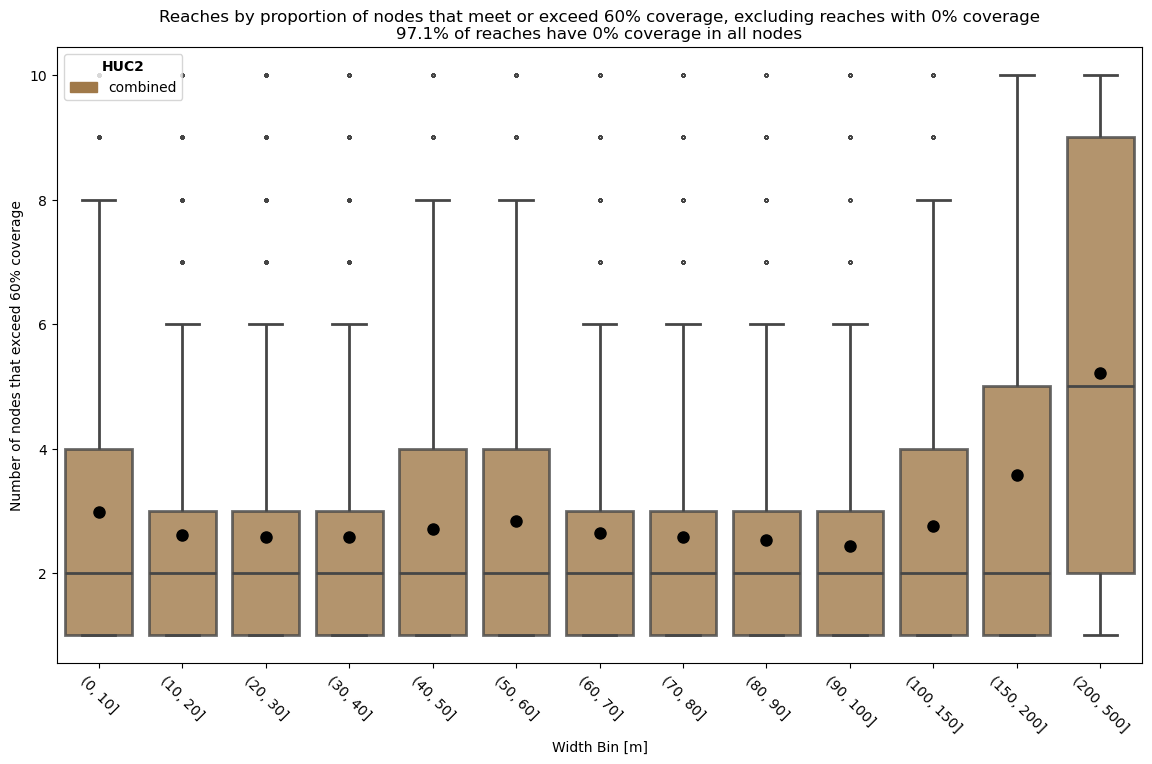

In [48]:
for i in range(5, len(thresholds)):

    zeros = 0
    reaches = 0
    
    # Get ne reaches at threshold
    ne = ddf_ne_melted[ddf_ne_melted['threshold'] == thresholds[i]].reset_index()#.drop(columns='index')
    # ne = ne.sample(frac=0.05)
    ne = ne.compute()
    
    zeros += ne[ne.coverage == 0].count()
    reaches += ne.shape[0]
    
    ne = ne[ne.coverage != 0]
    if ne.shape[0] > 100000:
        ne = ne.sample(100000)
    
    # Get se reaches at threshold
    se = ddf_se_melted[ddf_se_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
    # se = se.sample(frac=0.05)
    se = se.compute()
    
    zeros += se[se.coverage == 0].count()
    reaches += se.shape[0]
    
    se = se[se.coverage != 0]
    if se.shape[0] > 100000:
        se = se.sample(100000)
    
    # Get sw reaches
    sw = ddf_sw_melted[ddf_sw_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
    # sw = sw.sample(frac=0.05)
    sw = sw.compute()
    
    zeros += sw[sw.coverage == 0].count()
    reaches += sw.shape[0]
    
    sw = sw[sw.coverage != 0]
    if sw.shape[0] > 100000:
        sw = sw.sample(100000)
    
    # Get nw reaches
    nw = ddf_nw_melted[ddf_nw_melted['threshold'] == thresholds[i]].reset_index().drop(columns='index')
    # nw = nw.sample(frac=0.05)
    nw = nw.compute()
    
    zeros += nw[nw.coverage == 0].count()
    reaches += nw.shape[0]
    
    nw = nw[nw.coverage != 0]
    if nw.shape[0] > 100000:
        nw = nw.sample(100000)
    
    #     # Get combined reaches at 10% threshold
    #     both = pd.concat(objs=[ne, sw], axis=0).reset_index()
    
    #     combo = both.copy()
    #     combo['huc2'] = 'combined'
    
    combined = pd.concat(objs=[ne, se, sw, nw], axis=0).reset_index().drop(columns='index')
    
    del ne, se, sw, nw
    
    percent = str(int(float(thresholds[i])*100))

    all_zeros = round(((zeros['coverage']/reaches)*100), 1)

    fig, ax = plt.subplots(figsize=(14,8))
    sns.boxplot(data=combined, x='Bin', y='coverage',
                order=order,
                color=palette[3],
                saturation=1, showmeans=True,
                fliersize=2, linewidth=2,
                boxprops=dict(alpha=0.8),
                meanprops={'marker':'o',
                           'markerfacecolor':'k',
                           'markeredgecolor':'k',
                           'markersize':'8'})

    plt.title('Reaches by proportion of nodes that meet or exceed ' + percent +
              '% coverage, excluding reaches with 0% coverage\n' + str(all_zeros) +
              '% of reaches have 0% coverage in all nodes')

    patch = mpatches.Patch(color=palette[3], label='combined')
    plt.legend(handles=[patch], title='HUC2', loc='upper left',
               title_fontproperties={'weight': 'bold'})

    plt.xticks(rotation=-45)

    plt.xlabel('Width Bin [m]')
    plt.ylabel('Number of nodes that exceed ' + percent + '% coverage')

    plt.savefig(save_path + 'threshold_combined_mean_' + percent + '.png')

    del combined

### All three

In [ ]:
for i in range(len(thresholds)):

    # Get ne reaches at threshold
    ne = ddf_ne_melted[ddf_ne_melted['threshold'] == thresholds[i]]
    ne = ne.compute().reset_index().drop(columns=['NHDPlusID', 'index'])

    zeros = ne[ne.coverage == 0].count()
    reaches = ne.shape[0]
    ne_zeros = round(((zeros['coverage']/reaches)*100), 1)

    ne = ne[ne.coverage != 0]
    if ne.shape[0] > 100000:
        ne = ne.sample(100000)
    ne['huc2'] = '01'

    # Get sw reaches
    sw = ddf_sw_melted[ddf_sw_melted['threshold'] == thresholds[i]]
    sw = sw.compute().reset_index().drop(columns=['NHDPlusID', 'index'])

    zeros = sw[sw.coverage == 0].count()
    reaches = sw.shape[0]
    sw_zeros = round(((zeros['coverage']/reaches)*100), 1)

    sw = sw[sw.coverage != 0]
    if sw.shape[0] > 100000:
        sw = sw.sample(100000)
    sw['huc2'] = '15'

    # Get combined reaches at 10% threshold
    both = pd.concat(objs=[ne, sw], axis=0).reset_index()

    combo = both.copy()
    combo['huc2'] = 'combined'

    combined = pd.concat(objs=[ne, sw, combo], axis=0).reset_index().drop(columns=['index'])

    del ne, sw, combo

    percent = str(int(thresholds[i]*100))

    fig, ax = plt.subplots(figsize=(12,6))
    sns.boxplot(data=combined, x='Bin', y='coverage',
                order=order,
                hue='huc2', palette=palette,
                legend=True,
                saturation=1, showmeans=True,
                fliersize=2, linewidth=2,
                boxprops=dict(alpha=0.8),
                meanprops={'marker':'o',
                           'markerfacecolor':'k',
                           'markeredgecolor':'k',
                           'markersize':'8'})

    plt.title('Reaches with at least ' + percent +
              '% coverage in each node, excluding reaches with 0% coverage\nHUC2_01: ' + str(ne_zeros) +
              '% of reaches have 0% coverage in all nodes\nHUC2_15: ' +
              str(sw_zeros) + '% of reaches have 0% coverage in all nodes')

    plt.legend(title='HUC2', loc='upper right',
               title_fontproperties={'weight': 'bold'})

    plt.xlabel('Width Bin [m]')
    plt.ylabel('Reaches with at least ' + percent + '% coverage')
    plt.xticks(rotation=-45)

    plt.savefig(save_path + 'threshold_all_three_mean_' + percent + '.png')

### Combined old

In [ ]:
for i in range(len(thresholds)):
    # Make combined dataframe
    ddf_combo = dd.concat(dfs=[ddf_ne_melted, ddf_sw_melted], axis=0)

    # Get combined reaches at 10% threshold
    ddf_combo = ddf_combo[(ddf_combo['threshold'] == thresholds[i])]
    combo = ddf_combo.compute().drop(columns=['NHDPlusID']).reset_index()
    combo = combo.drop(columns=['index', 'threshold'])
    combo['coverage'] = combo['coverage']*100
    # combo['huc2'] = '01, 15'

    percent = str(int(thresholds[i]*100))

    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(x='Bin', y='coverage',
                data=combo,
                order=order,
                color=color[2],
                saturation=1, showmeans=True,
                fliersize=2, linewidth=2,
                boxprops=dict(alpha=0.8),
                meanprops={'marker':'o',
                           'markerfacecolor':'k',
                           'markeredgecolor':'k',
                           'markersize':'8'})

    plt.title('Reaches with at least ' + percent +'% coverage in each node, HUC2_01 and HUC2_15')
    plt.xticks(rotation=-45)

    plt.xlabel('Width Bin [m]')
    plt.ylabel('Detected [%]')

    plt.savefig('./figures_for_2025_03_06/threshold_combined_mean_' + percent + '.png')

### Side-by-side old

In [ ]:
for i in range(len(thresholds)):

    # Get ne reaches at 10% threshold
    ddf_ne_thresh = ddf_ne[(ddf_ne['threshold'] == thresholds[i])]
    ne = ddf_ne_thresh.compute().drop(columns=['NHDPlusID']).reset_index()
    ne = ne.drop(columns=['index', 'threshold'])
    ne['coverage'] = ne['coverage']*100
    ne['huc2'] = '01'

    # Get sw reaches at 10% threshold
    ddf_sw_melted_thresh = ddf_sw_melted[(ddf_sw_melted['threshold'] == thresholds[i])]
    sw = ddf_sw_melted_thresh.compute().drop(columns=['NHDPlusID']).reset_index()
    sw = sw.drop(columns=['index', 'threshold'])
    sw['coverage'] = sw['coverage']*100
    sw['huc2'] = '15'

    combo = pd.concat(objs=[ne, sw], axis=0).reset_index()

    del ne, sw

    percent = str(int(thresholds[i]*100))

    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(x='Bin', y='coverage', hue='huc2',
                data=combo, order=order,
                palette=palette_two,
                legend=True,
                saturation=1, showmeans=True,
                fliersize=2, linewidth=2,
                boxprops=dict(alpha=0.8),
                meanprops={'marker':'o',
                           'markerfacecolor':'k',
                           'markeredgecolor':'k',
                           'markersize':'8'})

    plt.legend(title='HUC2', loc='upper right')

    plt.title('Reaches with at least ' + percent +'% coverage in each node, HUC2_01 and HUC2_15')
    plt.xlabel('Width Bin [m]')
    plt.ylabel('Detected [%]')
    plt.xticks(rotation=-45)

    plt.savefig('./figures_for_2025_03_06/threshold_huc2_01_and_huc_15_mean_' + percent + '.png')

In [ ]:
del combo